In [7]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(context='notebook')

#carga del conjunto de datos
titanic = pd.read_csv('titanic.csv', sep=',')

#mirar encabezado con los datos
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [10]:
# Eliminamos las columnas que no nos interesan
titanic.drop(
    ['Name', 'Fare'], 
    axis=1,
    inplace=True)

In [11]:
#mirar encabezado con los datos sin las columnas eliminadas
titanic.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [12]:
# Renombramos las columnas Siblings/Spouses Aboard	y Parents/Children Aboard por SibSp y ParCh 
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [13]:
# Analizamos el shape del objeto
titanic.shape

# Visualizamos los tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [14]:
# Cambiamos los tipos de datos de Sex
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

titanic.dtypes

titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [15]:
# Renombramos columna Sex_male a Sex
titanic.rename(columns={'Sex_male':'Sex'},inplace=True)

# Ordenar colummas por nombres
titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','ParCh']]
titanic


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0
...,...,...,...,...,...,...
882,0,2,True,27.0,0,0
883,1,1,False,19.0,0,0
884,0,3,False,7.0,1,2
885,1,1,True,26.0,0,0


In [16]:
# Vemos la proporcion del a variable objetivo
titanic.Survived.value_counts(normalize=True)

Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64

In [17]:
# importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [18]:
# Separamos en X e y
X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic.Survived

# Balanceamos los datos
X_over_titanic, y_over_titanic  = undersample.fit_resample(X_titanic,y_titanic)
y_over_titanic.value_counts(normalize=True)

# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_over_titanic,y_over_titanic, test_size=0.30, random_state=42)

# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_titanic, y_train_titanic)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7908687943262411
El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8252427184466019


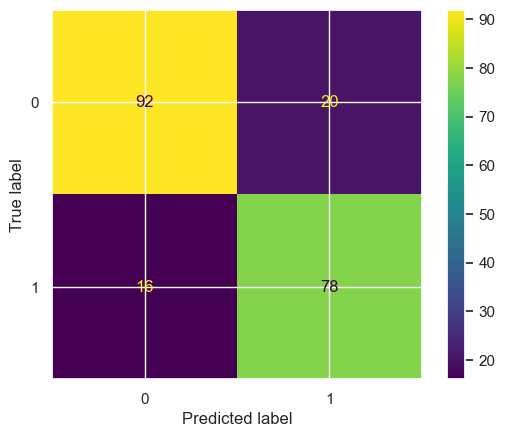

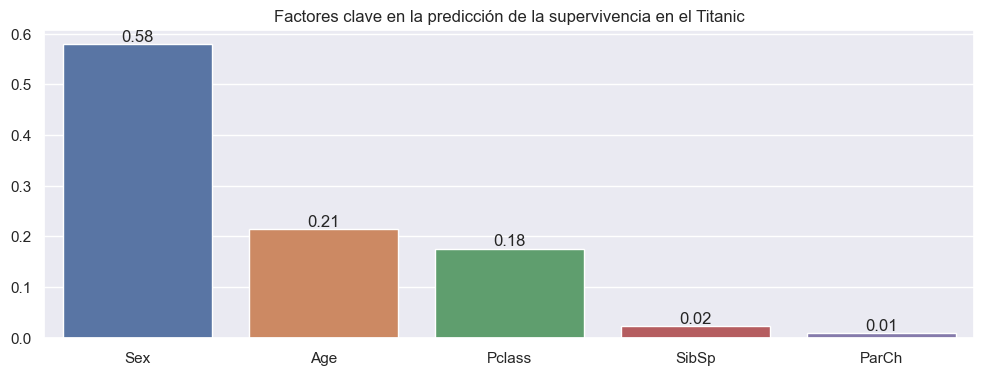

In [19]:

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

# Pronosticamos Y
y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)

# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_titanic,y_test_pred_titanic,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train_titanic)
y_test_pred = best_clf.predict(X_test_titanic)

from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train_titanic,y_train_pred_titanic))
print('El accuracy en test es:', accuracy_score(y_test_titanic,y_test_pred_titanic))

feature_scores_titanic = pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train_titanic.columns).sort_values(ascending=False)).T

plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()